In [96]:
import pandas as pd

In [97]:
caminho = r"C:\Users\luanl\Projetos\Python\energy-ml-api\data\KAG_energydata_complete.csv"
df = pd.read_csv(caminho)

In [98]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  str    
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9           19

In [99]:
# Remover atributos rv1 e rv2
df = df.drop(columns=["rv1", "rv2"])

# Converter atributo date ("str") para formato "date"
df["date"] = pd.to_datetime(df["date"])

# Criar colunas para horas e dias da semana
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)
df['month'] = df['date'].dt.month
df = df.drop(columns="date")

# Criar uma média para temperatura e umidade de todos os cômodos
temp_cols = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]
hum_cols = ["RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"]

df["avg_temp"] = df[temp_cols].mean(axis=1)
df["avg_humidity"] = df[hum_cols].mean(axis=1)

# Remover temperatura e umidade dos cômodos
df = df.drop(columns=temp_cols)
df = df.drop(columns=hum_cols)

In [100]:
# Cria a nova base tratada
df.to_csv("../data/KAG_energydata_processed.csv", index=False)

In [101]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Appliances    19735 non-null  int64  
 1   lights        19735 non-null  int64  
 2   T_out         19735 non-null  float64
 3   Press_mm_hg   19735 non-null  float64
 4   RH_out        19735 non-null  float64
 5   Windspeed     19735 non-null  float64
 6   Visibility    19735 non-null  float64
 7   Tdewpoint     19735 non-null  float64
 8   hour          19735 non-null  int32  
 9   day_of_week   19735 non-null  int32  
 10  is_weekend    19735 non-null  int64  
 11  month         19735 non-null  int32  
 12  avg_temp      19735 non-null  float64
 13  avg_humidity  19735 non-null  float64
dtypes: float64(8), int32(3), int64(3)
memory usage: 1.9 MB


In [102]:
y = df["Appliances"]
X = df.drop(columns=["Appliances"])

In [103]:
y.describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

<Axes: xlabel='hour'>

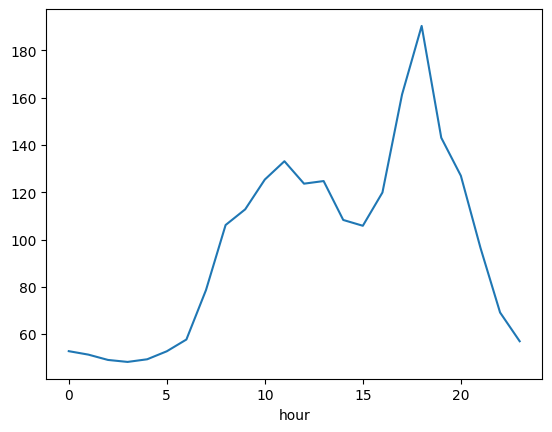

In [104]:
df.groupby('hour')['Appliances'].mean().plot()

In [105]:
df.corr(numeric_only=True)['Appliances'].sort_values()

RH_out         -0.152282
avg_humidity   -0.060228
Press_mm_hg    -0.034885
month          -0.011606
Visibility      0.000230
day_of_week     0.003060
Tdewpoint       0.015353
is_weekend      0.017437
avg_temp        0.078247
Windspeed       0.087122
T_out           0.099155
lights          0.197278
hour            0.216792
Appliances      1.000000
Name: Appliances, dtype: float64